In [12]:
import matplotlib.pyplot as plt # For general plotting
from matplotlib import cm

import numpy as np
from scipy.stats import multivariate_normal # MVN not univariate

import pandas


# TAKEN FROM MARK ZOLOTAS
#from module import model

#import model

from collections import defaultdict

from sklearn import preprocessing

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

In [2]:
# data = defaultdict(list) # each value in each column is appended to a list

# songdata = pandas.read_csv('data.csv', sep = ',')  


file_path = "data.csv"
songdata = pandas.read_csv(file_path, index_col='year')

songdata.drop(['artists','id', 'name', 'release_date', 'popularity'], axis = 1, inplace = True)

songdata.shape

(169909, 13)

In [3]:
print(songdata.head(3))

songdata.shape

songdata.columns

# see what data type Pandas interprets each column as 
songdata.dtypes


      acousticness  danceability  duration_ms  energy  explicit  \
year                                                              
1928         0.995         0.708       158648  0.1950         0   
1928         0.994         0.379       282133  0.0135         0   
1928         0.604         0.749       104300  0.2200         0   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
year                                                                          
1928             0.563   10    0.1510   -12.428     1       0.0506  118.469   
1928             0.901    8    0.0763   -28.454     1       0.0462   83.972   
1928             0.000    5    0.1190   -19.924     0       0.9290  107.177   

      valence  
year           
1928   0.7790  
1928   0.0767  
1928   0.8800  


acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [4]:
# size = len(songdata)

# labels = set()
# for ax in songdata.index:
#     labels.add(ax)


#songdata.drop(['artists','duration_ms','key', 'explicit', 'id', 'name', 'mode', 'release_date', 'popularity'])




In [6]:

l_drop = np.arange(1921,1950)
l_drop = np.concatenate((l_drop,[2020]))
songdata.drop(labels=l_drop, axis=0, inplace = True)

a = np.sort(songdata.index.unique())
a

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [21]:
#ax_pca = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)  # n_components is how many PCs we'll keep
X_fit = pca.fit(songdata)  # Is a fitted estimator, not actual data to project
Z = pca.transform(songdata)
#pca.get_precision()

# Illustrates that we have at least 90% of the total variance captured by the PCA
print("Explained variance ratio: ", pca.explained_variance_ratio_)


# from sklearn import preprocessing
# columns=data_scaled.columns,
# data_scaled = pandas.DataFrame(preprocessing.scale(df),columns = df.columns) 

print(pandas.DataFrame(pca.components_, index = ['PC-1','PC-2','PC-3']))

# print(pca.get_feature_names_out())

# print(pca.n_features_)

Explained variance ratio:  [9.99999926e-01 7.07794612e-08 2.14133704e-09]
                0             1         2             3             4   \
PC-1 -2.433327e-07 -1.597144e-07  1.000000  4.560708e-08 -3.041170e-08   
PC-2 -2.305726e-03 -2.932006e-04  0.000007  2.070077e-03  4.442109e-05   
PC-3  3.833283e-02 -9.979242e-03 -0.000001 -3.708352e-02 -1.101277e-02   

                5             6             7         8             9   \
PC-1  2.497162e-07 -4.098247e-08  7.519215e-08 -0.000002 -2.682527e-07   
PC-2 -7.797320e-04  7.080183e-04  9.829038e-05  0.035521  1.527426e-04   
PC-3  2.039671e-02 -3.213099e-02 -2.025015e-03 -0.997007  2.598109e-03   

                10        11            12  
PC-1 -1.707117e-08 -0.000007 -4.059832e-07  
PC-2  5.179413e-05  0.999363  1.298842e-03  
PC-3 -3.349782e-04  0.035656 -1.344646e-02  


In [9]:
unique_qualities = np.sort(songdata.index.unique())

print(unique_qualities)

print(unique_qualities[0])

print(unique_qualities[-1])

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
1950
2019


In [22]:
enc = LabelEncoder()

labels = songdata.index
enc.fit(songdata.index.unique())

y = enc.transform(np.array(labels))
print(np.unique(y))

y_decade = y//10
Y_decade = np.unique(y_decade)
print(np.unique(Y_decade))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
[0 1 2 3 4 5 6]


In [23]:
def get_pca(data, n_components=3):

    pca = decomposition.PCA()

    pca.n_components = n_components

    pca_data = pca.fit_transform(data)

    return pca_data

In [36]:
def plot_representations(data, labels, n_images=None):

    if n_images is not None:

        data = data[:n_images]

        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10')
    
    handles, labels = scatter.legend_elements()

    ax.legend(handles=handles, labels=labels)
    
    ax.set_xlabel(r"$pca_0$")
    ax.set_ylabel(r"$pca_1$")
    ax.set_zlabel(r"$pca_2$")



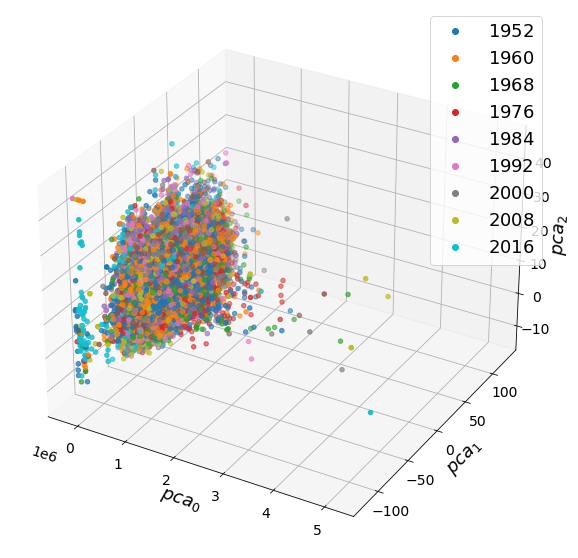

In [37]:
# output_pca_data = get_pca(outputs)

plot_representations(Z, labels)

InvalidIndexError: (slice(None, None, None), 0)

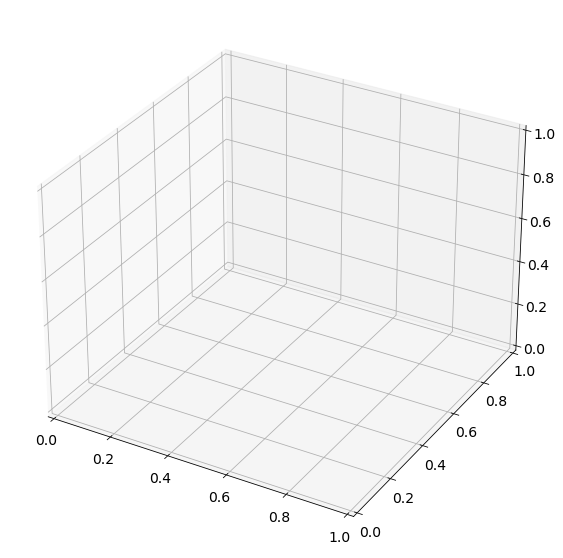

In [38]:
plot_representations(songdata, labels)

In [19]:
# plot original data

#wine_df[wine_df['quality']==q]['fixed acidity'], 

fig = plt.figure(figsize=(10, 2020))

ax_subset = fig.add_subplot(111, projection='3d')

for q in range(unique_qualities[0], unique_qualities[-1]):
    ax_subset.scatter(songdata[songdata['energy']==q], 
                      songdata[songdata['liveness']==q], 
                      songdata[songdata['tempo']==q],
                      label="year{}".format(q))
    
ax_subset.set_xlabel("fixed acidity")
ax_subset.set_ylabel("alcohol")
ax_subset.set_zlabel("pH")

# Set equal axes for 3D plots to realize the additional challenges in visualization
# ax_subset.set_box_aspect((np.ptp(wine_df['fixed acidity']), np.ptp(wine_df['alcohol']), np.ptp(wine_df['pH'])))

plt.title("Wine Subset of Features")
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Image size of 720x145440 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 720x145440 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x145440 with 1 Axes>

In [ ]:


for q in range(unique_qualities[0], unique_qualities[-1]):
    ax_pca.scatter(Z[wine_df['quality']==q, 0], 
                      Z[wine_df['quality']==q, 1], 
                      Z[wine_df['quality']==q, 2], label="Quality {}".format(q))
    
ax_pca.set_xlabel(r"$z_1$")
ax_pca.set_ylabel(r"$z_2$")
ax_pca.set_zlabel(r"$z_3$")

ax_pca.set_box_aspect((np.ptp(Z[:, 0]), np.ptp(Z[:, 1]), np.ptp(Z[:, 2])))

plt.title("PCA of Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

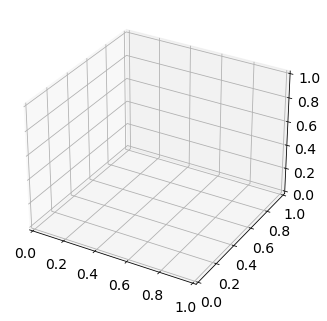

In [6]:
# # TAKEN FROM PCA EXAMPLE BY MARK ZOLOTAS

# # Perform PCA on transposed GMM variable X
# _, _, Z = models.perform_pca(X)

# # Add back mean vector to PC projections if you want PCA reconstructions
# Z_GMM = Z + np.mean(X, axis=0)


# Plot original data vs PCA reconstruction data
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(songdata[:, 0], songdata[:, 1], songdata[:, 2])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("x3")
ax1.set_title("x ~ {}D GMM data".format(n))

# ax2 = fig.add_subplot(212, projection='3d')
# ax2.scatter(Z_GMM[:, 0], Z_GMM[:, 1], Z_GMM[:, 2])
# ax2.set_xlabel("z1")
# ax2.set_ylabel("z2")
# ax2.set_zlabel("z3")
# ax2.set_title("PCA projections of {}D GMM data".format(n))
# plt.show()

# # Let's see what it looks like only along the first two PCs
# fig = plt.figure(figsize=(12, 12))

# ax1 = fig.add_subplot(211)
# ax1.scatter(X[:, 0], X[:, 1])
# ax1.set_xlabel("x1")
# ax1.set_ylabel("x2")
# ax1.set_title("x ~ {}D GMM data to 2D space".format(n))

# ax2 = fig.add_subplot(212)
# ax2.scatter(Z_GMM[:, 0], Z_GMM[:, 1])
# ax2.set_xlabel("z1")
# ax2.set_ylabel("z2")
# ax2.set_title("PCA projections of {}D GMM data to 2D space".format(n))
# plt.show()